# PD model

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## Import data

In [3]:
data_backup = pd.read_csv('credit_risk_dataset.csv')

In [4]:
credit_data = data_backup.copy()

In [5]:
credit_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [6]:
credit_data.shape

(32581, 12)

In [7]:
credit_data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [8]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [9]:
credit_data['person_emp_length'].unique()

array([123.,   5.,   1.,   4.,   8.,   2.,   6.,   7.,   0.,   9.,   3.,
        10.,  nan,  11.,  18.,  12.,  17.,  14.,  16.,  13.,  19.,  15.,
        20.,  22.,  21.,  24.,  23.,  26.,  25.,  27.,  28.,  31.,  41.,
        34.,  29.,  38.,  30.])

In [10]:
credit_data['person_emp_length'].fillna(0, inplace=True)

In [11]:
credit_data['person_emp_length'].isnull().sum()

0

In [12]:
credit_data['loan_int_rate'].mean()

11.01169489224439

In [13]:
credit_data['loan_int_rate'].fillna(credit_data['loan_int_rate'].mean(), inplace=True)

In [14]:
credit_data['cb_person_default_on_file'].unique()

array(['Y', 'N'], dtype=object)

credit_data['cb_person_default_on_file_int'] = np.where(credit_data['cb_person_default_on_file'] == 'Y', 1, 0)

credit_data['cb_person_default_on_file_int'].head()

In [15]:
credit_data.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [16]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               32581 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [17]:
credit_data['loan_status'].unique()

array([1, 0], dtype=int64)

### continuous variables: 
'person_age', 

'person_income', 

'person_emp_length', 

'loan_amnt', 

'loan_int_rate', 

'loan_percent_income', 

'cb_person_cred_hist_length'

### discrete variables: 
'person_home_ownership', 

'loan_grade', 

'loan_intent', 

'cb_person_default_on_file'

### target variable: 
'loan_status'

In [18]:
credit_data['person_age'].describe()

count    32581.000000
mean        27.734600
std          6.348078
min         20.000000
25%         23.000000
50%         26.000000
75%         30.000000
max        144.000000
Name: person_age, dtype: float64

(array([4.877e+03, 7.438e+03, 7.652e+03, 3.541e+03, 3.422e+03, 1.565e+03,
        1.646e+03, 6.750e+02, 7.000e+02, 3.050e+02, 2.960e+02, 1.240e+02,
        1.270e+02, 5.400e+01, 5.000e+01, 2.400e+01, 3.100e+01, 1.000e+01,
        1.900e+01, 5.000e+00, 7.000e+00, 3.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 3.000e+00]),
 array([ 20.  ,  22.48,  24.96,  27.44,  29.92,  32.4 ,  34.88,  37.36,
         39.84,  42.32,  44.8 ,  47.28,  49.76,  52.24,  54.72,  57.2 ,
         59.68,  62.16,  64.64,  67.12,  69.6 ,  72.08,  74.56,  77.04,
         79.52,  82.  ,  84.48,  86.96,  89.44,  91.92,  94.4 ,  96.88,
         99.36, 101.84, 104.32, 106.8 , 109.28, 111.76, 114.24, 116.72,
        119.2 , 

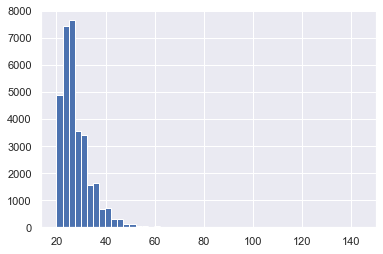

In [19]:
plt.hist(x='person_age', data=credit_data, bins=50)

In [20]:
(credit_data['person_age'] > 120).sum()

5

In [21]:
credit_data = credit_data[credit_data['person_age']<120]

In [22]:
credit_data['person_income'].describe()

count    3.257600e+04
mean     6.588214e+04
std      5.253499e+04
min      4.000000e+03
25%      3.850000e+04
50%      5.500000e+04
75%      7.920000e+04
max      2.039784e+06
Name: person_income, dtype: float64

In [23]:
credit_data['person_emp_length'].describe()

count    32576.000000
mean         4.657938
std          4.159740
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max        123.000000
Name: person_emp_length, dtype: float64

In [24]:
credit_data['loan_amnt'].describe()

count    32576.000000
mean      9589.117755
std       6321.886846
min        500.000000
25%       5000.000000
50%       8000.000000
75%      12200.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [25]:
credit_data['loan_int_rate'].describe()

count    32576.000000
mean        11.011561
std          3.081787
min          5.420000
25%          8.490000
50%         11.011695
75%         13.110000
max         23.220000
Name: loan_int_rate, dtype: float64

In [26]:
credit_data['loan_percent_income'].describe()

count    32576.000000
mean         0.170212
std          0.106778
min          0.000000
25%          0.090000
50%          0.150000
75%          0.230000
max          0.830000
Name: loan_percent_income, dtype: float64

In [27]:
credit_data['cb_person_cred_hist_length'].describe()

count    32576.000000
mean         5.803966
std          4.053791
min          2.000000
25%          3.000000
50%          4.000000
75%          8.000000
max         30.000000
Name: cb_person_cred_hist_length, dtype: float64

### create dummy varialbes for discrete variables:

In [28]:
credit_data['person_home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [29]:
credit_data['loan_grade'].unique()

array(['D', 'B', 'C', 'A', 'E', 'F', 'G'], dtype=object)

In [30]:
credit_data['loan_intent'].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [31]:
dummies = [
    pd.get_dummies(credit_data['person_home_ownership'], prefix='person_home_ownership', prefix_sep=':'),
    pd.get_dummies(credit_data['loan_grade'], prefix='loan_grade', prefix_sep=':'), 
    pd.get_dummies(credit_data['cb_person_default_on_file'], prefix='cb_person_default_on_file', prefix_sep=':'),
    pd.get_dummies(credit_data['loan_intent'], prefix='loan_intent', prefix_sep=':')
]

In [32]:
dummies = pd.concat(dummies, axis=1)

In [33]:
type(dummies)

pandas.core.frame.DataFrame

credit_data['cb_person_default_on_file:Y'] = credit_data['cb_person_default_on_file_int']

credit_data['cb_person_default_on_file:N'] = 1 - credit_data['cb_person_default_on_file:Y'] 

In [34]:
credit_data = pd.concat([credit_data, dummies], axis=1)

In [35]:
type(credit_data)

pandas.core.frame.DataFrame

In [36]:
credit_data.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,...,loan_grade:F,loan_grade:G,cb_person_default_on_file:N,cb_person_default_on_file:Y,loan_intent:DEBTCONSOLIDATION,loan_intent:EDUCATION,loan_intent:HOMEIMPROVEMENT,loan_intent:MEDICAL,loan_intent:PERSONAL,loan_intent:VENTURE
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,...,0,0,0,1,0,0,0,0,1,0
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,...,0,0,1,0,0,1,0,0,0,0
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,...,0,0,1,0,0,0,0,1,0,0
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,...,0,0,1,0,0,0,0,1,0,0
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,...,0,0,0,1,0,0,0,1,0,0
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,...,0,0,1,0,0,0,0,0,0,1
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,...,0,0,1,0,0,1,0,0,0,0
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,...,0,0,1,0,0,0,0,1,0,0
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,...,0,0,1,0,0,0,0,0,1,0
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,...,0,0,1,0,0,0,0,0,0,1


In [37]:
credit_data['loan_status'].sum() / credit_data.shape[0]

0.2181974459724951

We guess 'loan_status' = 1 means that the loan is defaulted.

After some examination below. We deduct that our guess is true. So we change the dependent variable to 'good_bad' having 1 representing a non-default (good) situation.

In [38]:
credit_data['good_bad'] = 1 - credit_data['loan_status']

In [39]:
credit_data['good_bad'].sum() / credit_data.shape[0]

0.7818025540275049

Independent Variables dummies classing according to **WoE**

fine classing -> WoE calculation -> Coarse classing

# $\text{WoE}_{i}=\ln \left(\frac{\%(y=1)_i}{\%(y=0)_i}\right)$

Information Value (IF)

# $\text{IF} = \sum_{i=1}^{k}\left[\left(\%(y=1)_i-\%(y=0)_i\right)\right]\times\text{WoE_i}$
Suppose there are k categories for this variable. Either continuous after classing or discrete.

More advanced methods: classing with WoE and sample size. abnormal values goes to the two side classes.

## Splitting data

In [40]:
X_train, X_test, y_train, y_test = train_test_split(credit_data.drop('good_bad', axis=1), credit_data['good_bad'], test_size=0.2, random_state=42)

In [41]:
X_train.shape

(26060, 31)

In [42]:
y_train.shape

(26060,)

In [43]:
X_test.shape

(6516, 31)

In [44]:
y_test.shape

(6516,)

# ***marker for rerun

In [45]:
X_prep = X_train
y_prep = y_train
#X_prep = X_test
#y_prep = y_test

# Automatic WoE and IV calculator

In [46]:
def woe_discrete(df, var_name, df_target):
    df = pd.concat([df[var_name], df_target],axis=1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
                df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()], axis=1)
    df = df.iloc[:,[0,1,3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs']/df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good']/df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good']-df['prop_n_bad'])*df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [47]:
def woe_continuous(df, var_name, df_target):
    df = pd.concat([df[var_name], df_target],axis=1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
                df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()], axis=1)
    df = df.iloc[:,[0,1,3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs']/df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good']/df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good']-df['prop_n_bad'])*df['WoE']
    df['IV'] = df['IV'].sum()
    return df

# WoE Plotter

In [48]:
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize = (18, 6))
    plt.plot(x, y, marker='o', linestyle='--', color='k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

# classing discrete variables

In [49]:
X_prep['person_home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER'], dtype=object)

In [50]:
df = woe_discrete(X_prep, 'person_home_ownership', y_prep)

In [51]:
df

,person_home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,OTHER,93,0.677419,0.003569,63.0,30.0,0.003092,0.005274,-0.533865,NaN,NaN,0.384889
1,RENT,13135,0.683213,0.504029,8974.0,4161.0,0.440507,0.731540,-0.507227,0.005793,0.026639,0.384889
2,MORTGAGE,10766,0.875070,0.413124,9421.0,1345.0,0.462448,0.236463,0.670745,0.191857,1.177971,0.384889
3,OWN,2066,0.926428,0.079279,1914.0,152.0,0.093952,0.026723,1.257267,0.051358,0.586523,0.384889


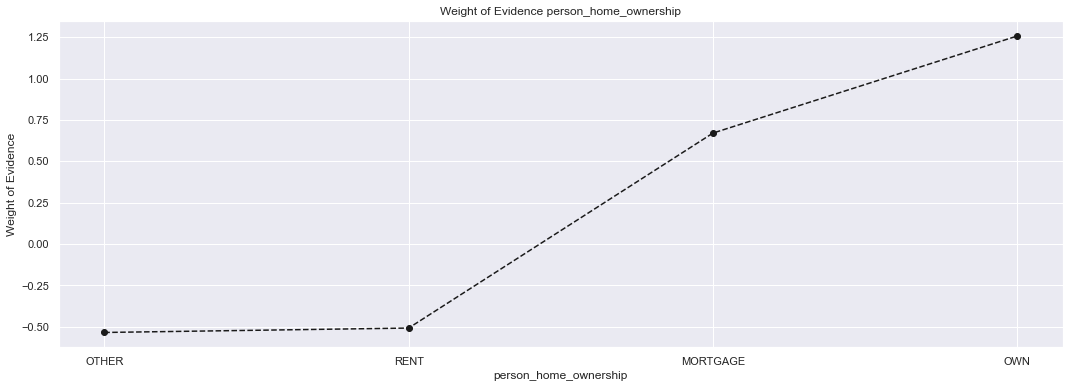

In [52]:
plot_by_woe(df)

In [54]:
# 'person_home_ownership:OWN', 'person_home_ownership:MORGAGE', 'person_home_ownership:OTHER_RENT'

X_prep['person_home_ownership:OTHER_RENT'] = sum([X_prep['person_home_ownership:OTHER'], X_prep['person_home_ownership:RENT']])

In [55]:
df= woe_discrete(X_prep,'cb_person_default_on_file',y_prep)

In [56]:
df

,cb_person_default_on_file,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Y,4634,0.620414,0.17782,2875.0,1759.0,0.141125,0.309248,-0.784496,NaN,NaN,0.168515
1,N,21426,0.816625,0.82218,17497.0,3929.0,0.858875,0.690752,0.217842,0.19621,1.002337,0.168515


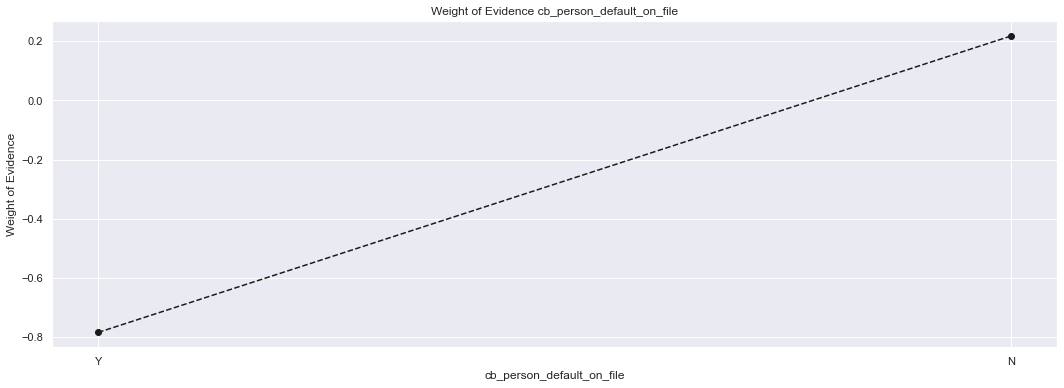

In [57]:
plot_by_woe(df)

In [58]:
# 'cb_person_default_on_file:Y', 'cb_person_default_on_file:N'

In [59]:
X_prep['loan_grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'G', 'F'], dtype=object)

In [60]:
df = woe_discrete(X_prep, 'loan_grade', y_prep)

C:\Users\YizhiZhang\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [61]:
df

,loan_grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,59,0.000000,0.002264,0.0,59.0,0.000000,0.010373,-inf,NaN,NaN,inf
1,F,190,0.305263,0.007291,58.0,132.0,0.002847,0.023207,-2.098162,0.305263,inf,inf
2,E,756,0.341270,0.029010,258.0,498.0,0.012664,0.087553,-1.933443,0.036007,0.164718,inf
3,D,2902,0.411096,0.111358,1193.0,1709.0,0.058561,0.300457,-1.635240,0.069826,0.298203,inf
4,C,5213,0.790716,0.200038,4122.0,1091.0,0.202337,0.191807,0.053441,0.379620,1.688681,inf
5,B,8379,0.839718,0.321527,7036.0,1343.0,0.345376,0.236111,0.380331,0.049003,0.326890,inf
6,A,8561,0.900012,0.328511,7705.0,856.0,0.378215,0.150492,0.921552,0.060293,0.541220,inf


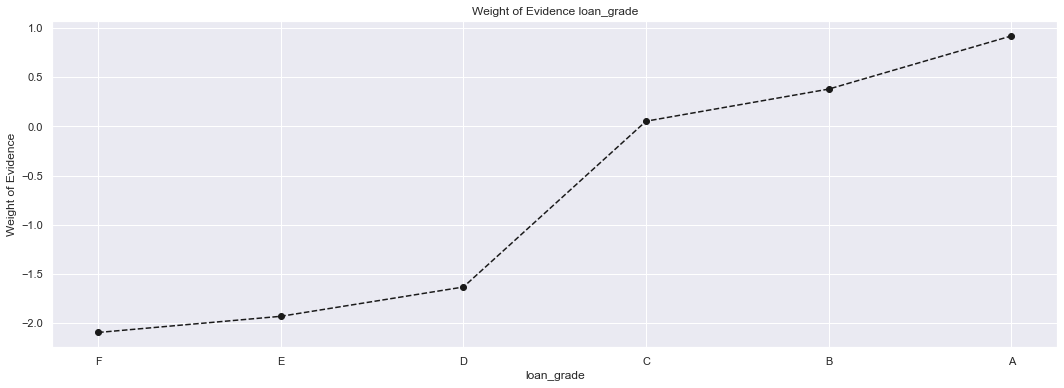

In [62]:
plot_by_woe(df)

In [63]:
# 'loan_grade:A',  'loan_grade:B', 'loan_grade:C', 'loan_grade:D', 'loan_grade:E', 'loan_grade:F', 'loan_grade:G',

In [64]:
X_prep['loan_intent'].unique()

array(['MEDICAL', 'EDUCATION', 'DEBTCONSOLIDATION', 'PERSONAL', 'VENTURE',
       'HOMEIMPROVEMENT'], dtype=object)

In [65]:
df = woe_discrete(X_prep, 'loan_intent', y_prep)

In [66]:
df

,loan_intent,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,DEBTCONSOLIDATION,4189,0.708522,0.160744,2968.0,1221.0,0.145690,0.214662,-0.387585,NaN,NaN,0.097187
1,MEDICAL,4877,0.736518,0.187145,3592.0,1285.0,0.176320,0.225914,-0.247852,0.027996,0.139732,0.097187
2,HOMEIMPROVEMENT,2882,0.740458,0.110591,2134.0,748.0,0.104752,0.131505,-0.227452,0.003940,0.020400,0.097187
3,PERSONAL,4414,0.800408,0.169378,3533.0,881.0,0.173424,0.154887,0.113042,0.059950,0.340495,0.097187
4,EDUCATION,5151,0.831101,0.197659,4281.0,870.0,0.210141,0.152954,0.317646,0.030693,0.204604,0.097187
5,VENTURE,4547,0.849791,0.174482,3864.0,683.0,0.189672,0.120077,0.457161,0.018690,0.139515,0.097187


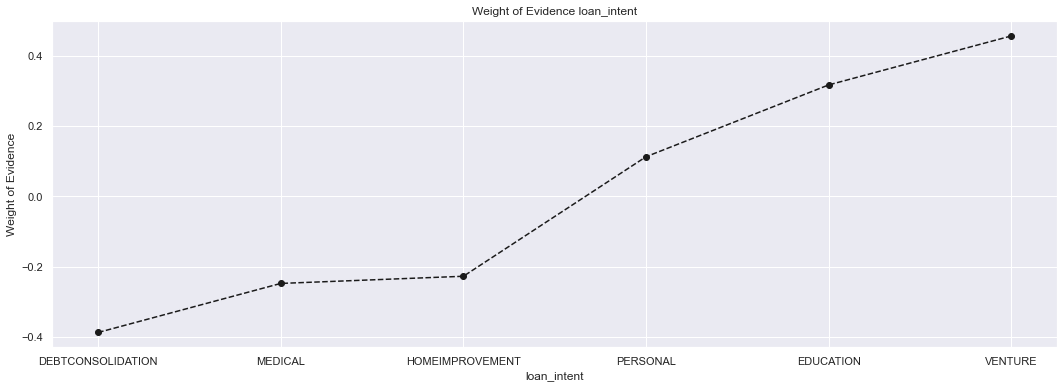

In [67]:
plot_by_woe(df)

In [68]:
# 'loan_intent:DEBTCONSOLIDATION', 'loan_intent:EDUCATION', 'loan_intent:HOMEIMPROVEMENT', 'loan_intent:MEDICAL', 'loan_intent:PERSONAL', 'loan_intent:VENTURE'

# Classing continuous variables

'person_age'

In [69]:
X_prep['person_age'].unique()

array([31, 27, 25, 21, 26, 23, 30, 29, 39, 24, 22, 34, 28, 36, 32, 37, 41,
       40, 42, 33, 47, 35, 44, 43, 46, 38, 53, 48, 45, 55, 70, 62, 64, 50,
       58, 20, 52, 49, 54, 67, 57, 66, 73, 65, 51, 69, 60, 61, 56, 84, 78,
       59, 76, 63, 94], dtype=int64)

In [70]:
df = woe_continuous(X_prep, 'person_age', y_prep)

In [71]:
df

,person_age,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,20,11,0.909091,0.000422,10.0,1.0,0.000491,0.000176,1.026782,NaN,NaN,inf
1,21,979,0.707865,0.037567,693.0,286.0,0.034017,0.050281,-0.390765,0.201226,1.417547,inf
2,22,2874,0.758525,0.110284,2180.0,694.0,0.107010,0.122011,-0.131195,0.050660,0.259570,inf
3,23,3100,0.783871,0.118956,2430.0,670.0,0.119281,0.117792,0.012566,0.025346,0.143761,inf
4,24,2881,0.788615,0.110553,2272.0,609.0,0.111526,0.107068,0.040795,0.004744,0.028229,inf
5,25,2380,0.768487,0.091328,1829.0,551.0,0.089780,0.096871,-0.076013,0.020128,0.116808,inf
6,26,2003,0.791812,0.076861,1586.0,417.0,0.077852,0.073312,0.060081,0.023325,0.136094,inf
7,27,1729,0.791209,0.066347,1368.0,361.0,0.067151,0.063467,0.056424,0.000603,0.003657,inf
8,28,1480,0.775000,0.056792,1147.0,333.0,0.056303,0.058544,-0.039040,0.016209,0.095465,inf
9,29,1348,0.803412,0.051727,1083.0,265.0,0.053161,0.046589,0.131958,0.028412,0.170998,inf


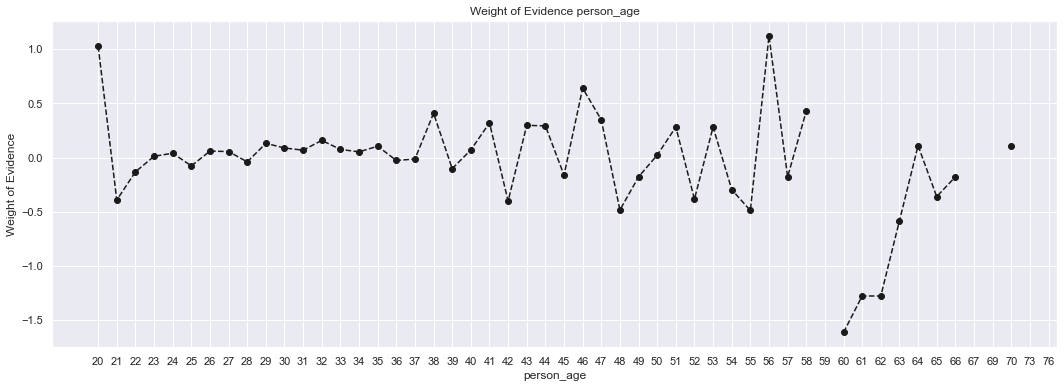

In [72]:
plot_by_woe(df)

In [73]:
# 'person_age:>37'

In [74]:
X_prep_temp = X_prep[X_prep['person_age']<=37]

In [75]:
df = woe_continuous(X_prep_temp, 'person_age', y_prep[X_prep_temp.index])

In [76]:
df

,person_age,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,20,11,0.909091,0.000456,10.0,1.0,0.000531,0.000189,1.031970,NaN,NaN,0.013393
1,21,979,0.707865,0.040619,693.0,286.0,0.036823,0.054146,-0.385577,0.201226,1.417547,0.013393
2,22,2874,0.758525,0.119243,2180.0,694.0,0.115834,0.131390,-0.126007,0.050660,0.259570,0.013393
3,23,3100,0.783871,0.128620,2430.0,670.0,0.129118,0.126846,0.017754,0.025346,0.143761,0.013393
4,24,2881,0.788615,0.119534,2272.0,609.0,0.120723,0.115297,0.045982,0.004744,0.028229,0.013393
5,25,2380,0.768487,0.098747,1829.0,551.0,0.097184,0.104317,-0.070825,0.020128,0.116808,0.013393
6,26,2003,0.791812,0.083105,1586.0,417.0,0.084272,0.078947,0.065269,0.023325,0.136094,0.013393
7,27,1729,0.791209,0.071737,1368.0,361.0,0.072689,0.068345,0.061612,0.000603,0.003657,0.013393
8,28,1480,0.775000,0.061406,1147.0,333.0,0.060946,0.063044,-0.033853,0.016209,0.095465,0.013393
9,29,1348,0.803412,0.055929,1083.0,265.0,0.057545,0.050170,0.137145,0.028412,0.170998,0.013393


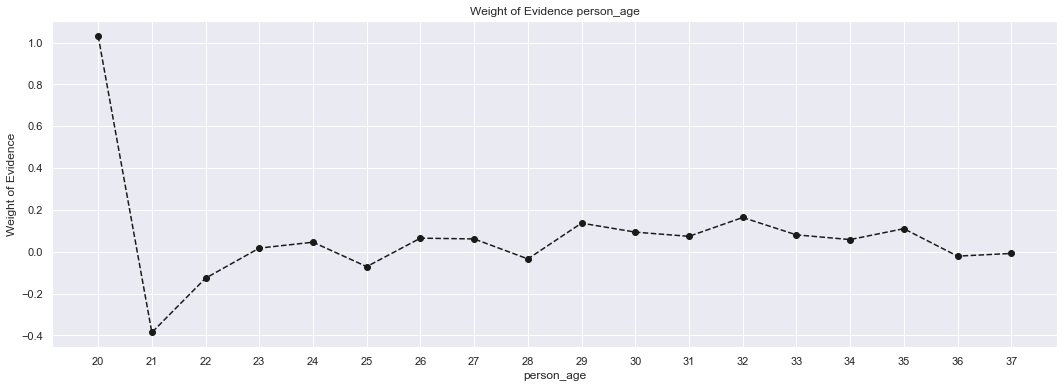

In [77]:
plot_by_woe(df)

In [78]:
# 'person_age:<=22', 'person_age:23-28', 'person_age:29-32', 'person_age:33-37',  'person_age:>=38'

X_prep['person_age:<=22'] = np.where((X_prep['person_age']<=22), 1, 0)

X_prep['person_age:23-28'] = np.where((X_prep['person_age']>=23) & (X_prep['person_age']<=28), 1, 0)

X_prep['person_age:29-33'] = np.where((X_prep['person_age']>=29) & (X_prep['person_age']<=32), 1, 0)

X_prep['person_age:34-37'] = np.where((X_prep['person_age']>=33) & (X_prep['person_age']<=37), 1, 0)

X_prep['person_age:>=38'] = np.where((X_prep['person_age']>=38), 1, 0)

'person_income'

In [82]:
X_prep['person_income'].nunique()

3722

In [83]:
X_prep['person_income_factor'] = pd.cut(X_prep['person_income'], 50)

In [84]:
df = woe_continuous(X_prep, 'person_income_factor', y_prep)

In [85]:
df

,person_income_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(1964.216, 44715.68]",8775,0.641481,0.336723,5629.0,3146.0,0.276311,0.553094,-0.694003,NaN,NaN,inf
1,"(44715.68, 85431.36]",12003,0.829709,0.460591,9959.0,2044.0,0.488857,0.359353,0.307765,0.188228,1.001768,inf
2,"(85431.36, 126147.04]",3618,0.908513,0.138833,3287.0,331.0,0.161349,0.058193,1.019809,0.078804,0.712044,inf
3,"(126147.04, 166862.72]",971,0.901133,0.037260,875.0,96.0,0.042951,0.016878,0.934073,0.007380,0.085737,inf
4,"(166862.72, 207578.4]",362,0.919890,0.013891,333.0,29.0,0.016346,0.005098,1.165044,0.018757,0.230971,inf
5,"(207578.4, 248294.08]",114,0.850877,0.004375,97.0,17.0,0.004761,0.002989,0.465695,0.069012,0.699349,inf
6,"(248294.08, 289009.76]",76,0.842105,0.002916,64.0,12.0,0.003142,0.002110,0.398174,0.008772,0.067521,inf
7,"(289009.76, 329725.44]",43,0.953488,0.001650,41.0,2.0,0.002013,0.000352,1.744622,0.111383,1.346448,inf
8,"(329725.44, 370441.12]",21,0.952381,0.000806,20.0,1.0,0.000982,0.000176,1.719930,0.001107,0.024693,inf
9,"(370441.12, 411156.8]",17,0.823529,0.000652,14.0,3.0,0.000687,0.000527,0.264642,0.128852,1.455287,inf


In [86]:
# 'person_income:>120K'
X_prep_temp = X_prep[X_prep['person_income']<120000]

In [87]:
X_prep_temp['person_income_factor'] = pd.cut(X_prep_temp['person_income'], 50)

C:\Users\YizhiZhang\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [88]:
df = woe_continuous(X_prep_temp, 'person_income_factor', y_prep[X_prep_temp.index])

C:\Users\YizhiZhang\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [89]:
df

,person_income_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(3884.3, 6314.0]",13,0.000000,0.000544,0.0,13.0,0.000000,0.002362,-inf,NaN,NaN,inf
1,"(6314.0, 8628.0]",23,0.260870,0.000963,6.0,17.0,0.000327,0.003089,-2.246915,0.260870,inf,inf
2,"(8628.0, 10942.0]",62,0.112903,0.002597,7.0,55.0,0.000381,0.009993,-3.266885,0.147966,1.019969,inf
3,"(10942.0, 13256.0]",135,0.140741,0.005654,19.0,116.0,0.001034,0.021076,-3.014613,0.027838,0.252272,inf
4,"(13256.0, 15570.0]",170,0.235294,0.007120,40.0,130.0,0.002177,0.023619,-2.384117,0.094553,0.630496,inf
5,"(15570.0, 17884.0]",153,0.267974,0.006408,41.0,112.0,0.002231,0.020349,-2.210388,0.032680,0.173728,inf
6,"(17884.0, 20198.0]",405,0.353086,0.016961,143.0,262.0,0.007783,0.047602,-1.810961,0.085113,0.399427,inf
7,"(20198.0, 22512.0]",310,0.664516,0.012983,206.0,104.0,0.011211,0.018895,-0.521976,0.311430,1.288985,inf
8,"(22512.0, 24826.0]",463,0.691145,0.019390,320.0,143.0,0.017416,0.025981,-0.399985,0.026629,0.121991,inf
9,"(24826.0, 27140.0]",617,0.653160,0.025840,403.0,214.0,0.021933,0.038881,-0.572501,0.037984,0.172516,inf


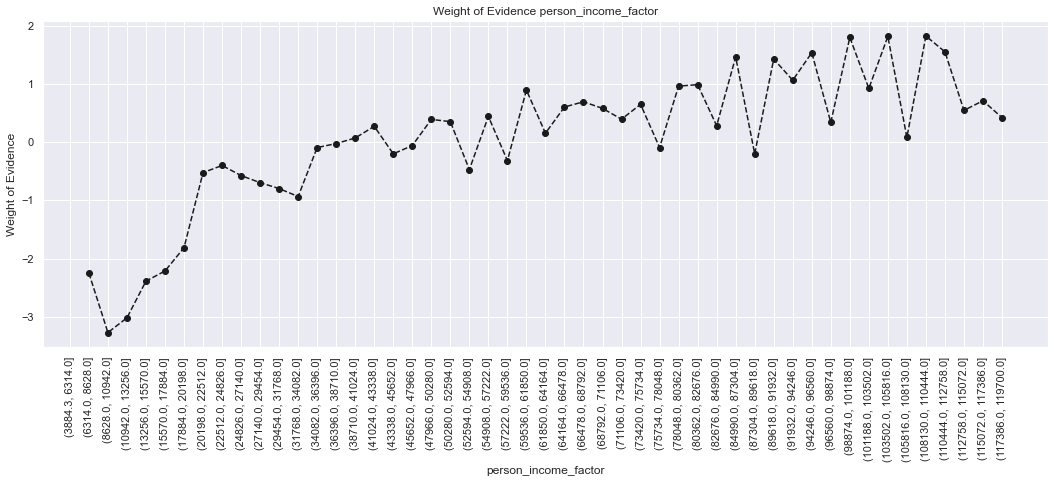

In [90]:
plot_by_woe(df, 90)

In [91]:
# 'person_income:<=20K', 'person_income:20K-34K',  'person_income:34K-52.5K', 'person_income:52.5K-66.5K', 'person_income:66.5K-75.7K',  'person_income:>75.7K',

X_prep['person_income:<=20K'] = np.where((X_prep['person_age']<=20000), 1, 0)

X_prep['person_income:20K-34K'] = np.where((X_prep['person_income']>20000) & (X_prep['person_age']<=34000), 1, 0)

X_prep['person_income:34K-52.5K'] = np.where((X_prep['person_income']>34000) & (X_prep['person_age']<=52500), 1, 0)

X_prep['person_income:52.5K-66.5K'] = np.where((X_prep['person_income']>52500) & (X_prep['person_age']<=66500), 1, 0)

X_prep['person_income:66.5K-75.7K'] = np.where((X_prep['person_income']>66500) & (X_prep['person_age']<=75700), 1, 0)

X_prep['person_income:>75.7K'] = np.where((X_prep['person_income']>75700), 1, 0)

'person_emp_length'

In [92]:
X_prep['person_emp_length'].unique()

array([  1.,   6.,   5.,  10.,   4.,   0.,   2.,  11.,   7.,   3.,   8.,
         9.,  17.,  13.,  14.,  15.,  16.,  12.,  18.,  24.,  22.,  20.,
        25., 123.,  19.,  21.,  23.,  26.,  31.,  27.,  29.,  38.,  41.,
        30.,  34.,  28.])

In [93]:
df = woe_continuous(X_prep, 'person_emp_length', y_prep)

C:\Users\YizhiZhang\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [94]:
df

,person_emp_length,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,4001,0.712822,0.153530,2852.0,1149.0,0.139996,0.202004,-0.366674,NaN,NaN,inf
1,1.0,2314,0.722990,0.088795,1673.0,641.0,0.082123,0.112693,-0.316458,0.010169,0.050216,inf
2,2.0,3088,0.740285,0.118496,2286.0,802.0,0.112213,0.140999,-0.228352,0.017294,0.088106,inf
3,3.0,2791,0.793981,0.107099,2216.0,575.0,0.108777,0.101090,0.073286,0.053696,0.301639,inf
4,4.0,2314,0.783924,0.088795,1814.0,500.0,0.089044,0.087904,0.012879,0.010057,0.060407,inf
5,5.0,2346,0.822251,0.090023,1929.0,417.0,0.094689,0.073312,0.255868,0.038327,0.242989,inf
6,6.0,2116,0.813800,0.081197,1722.0,394.0,0.084528,0.069269,0.199088,0.008451,0.056780,inf
7,7.0,1772,0.816027,0.067997,1446.0,326.0,0.070980,0.057314,0.213856,0.002227,0.014768,inf
8,8.0,1340,0.839552,0.051420,1125.0,215.0,0.055223,0.037799,0.379098,0.023525,0.165241,inf
9,9.0,1067,0.820056,0.040944,875.0,192.0,0.042951,0.033755,0.240926,0.019496,0.138172,inf


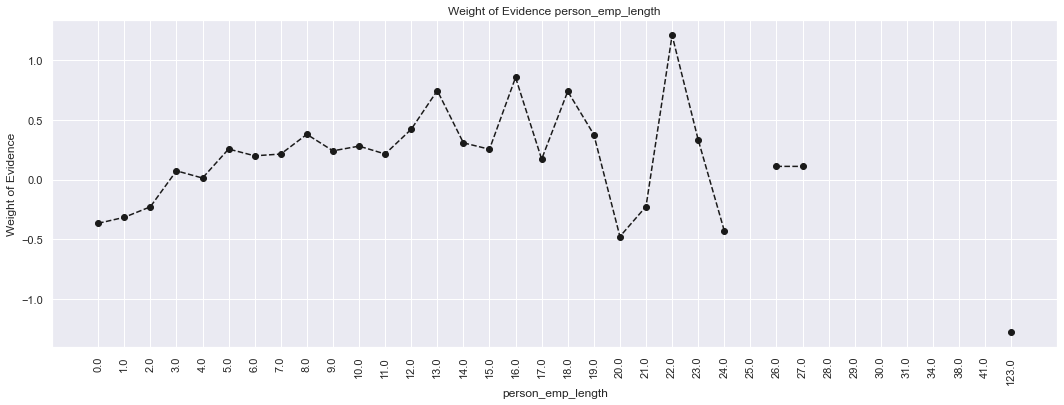

In [95]:
plot_by_woe(df,90)

In [ ]:
# 'person_emp_length:<=2', 'person_emp_length:3-7', 'person_emp_length:8-10', 'person_emp_length:>10',



In [96]:
X_prep['person_emp_length:<=2'] = np.where((X_prep['person_emp_length']<=2), 1, 0)

X_prep['person_emp_length:3-7'] = np.where((X_prep['person_emp_length']>2) & (X_prep['person_emp_length']<=7), 1, 0)

X_prep['person_emp_length:8-10'] = np.where((X_prep['person_emp_length']>7) & (X_prep['person_emp_length']<=10), 1, 0)

X_prep['person_emp_length:>10'] = np.where((X_prep['person_emp_length']>10), 1, 0)

'loan_amnt'

In [99]:
X_prep['loan_amnt'].nunique()

716

In [100]:
X_prep['loan_amnt_factor'] = pd.cut(X_prep['loan_amnt'], 50)

In [101]:
df = woe_continuous(X_prep, 'loan_amnt_factor', y_prep)

C:\Users\YizhiZhang\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [102]:
df

,loan_amnt_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(465.5, 1190.0]",263,0.794677,0.010092,209.0,54.0,0.010259,0.009494,0.077547,NaN,NaN,inf
1,"(1190.0, 1880.0]",695,0.795683,0.026669,553.0,142.0,0.027145,0.024965,0.083728,0.001007,0.006181,inf
2,"(1880.0, 2570.0]",1166,0.783877,0.044743,914.0,252.0,0.044866,0.044304,0.012599,0.011807,0.071129,inf
3,"(2570.0, 3260.0]",1261,0.761301,0.048388,960.0,301.0,0.047124,0.052918,-0.115980,0.022576,0.128578,inf
4,"(3260.0, 3950.0]",670,0.819403,0.025710,549.0,121.0,0.026949,0.021273,0.236505,0.058102,0.352485,inf
5,"(3950.0, 4640.0]",1422,0.797468,0.054566,1134.0,288.0,0.055665,0.050633,0.094743,0.021935,0.141762,inf
6,"(4640.0, 5330.0]",2226,0.810422,0.085418,1804.0,422.0,0.088553,0.074191,0.176954,0.012954,0.082210,inf
7,"(5330.0, 6020.0]",2046,0.856305,0.078511,1752.0,294.0,0.086000,0.051688,0.509131,0.045883,0.332177,inf
8,"(6020.0, 6710.0]",680,0.841176,0.026094,572.0,108.0,0.028078,0.018987,0.391205,0.015129,0.117926,inf
9,"(6710.0, 7400.0]",1244,0.842444,0.047736,1048.0,196.0,0.051443,0.034459,0.400721,0.001267,0.009516,inf


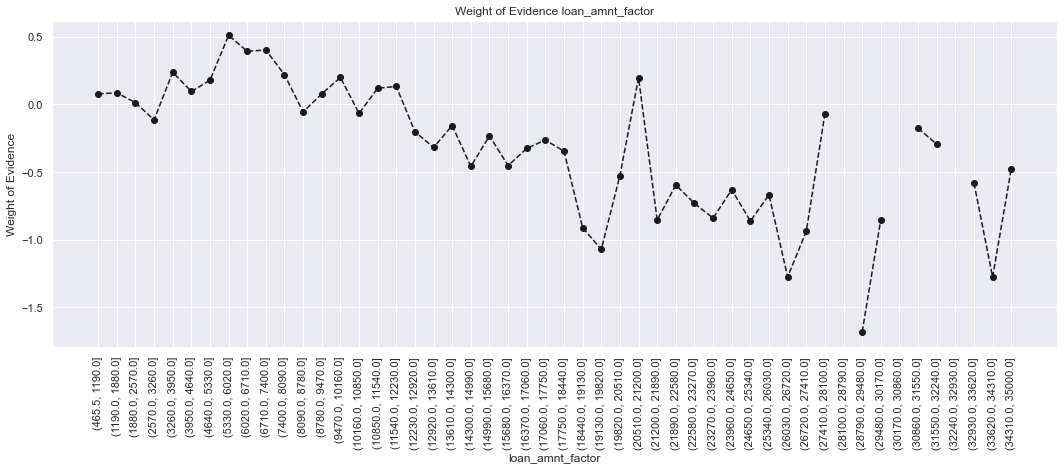

In [103]:
plot_by_woe(df,90)

In [ ]:
# 'loan_amnt:',

In [ ]:
### continuous variables: 
'person_age', 
'person_income', 
'person_emp_length', 
'loan_amnt', 
'loan_int_rate', 
'loan_percent_income', 
'cb_person_cred_hist_length'

categories:
    
'person_home_ownership:OWN', 
'person_home_ownership:MORGAGE', 
'person_home_ownership:OTHER_RENT',
'cb_person_default_on_file:Y', 
'cb_person_default_on_file:N',
'loan_grade:A',  
'loan_grade:B',
'loan_grade:C', 
'loan_grade:D', 
'loan_grade:E', 
'loan_grade:F', 
'loan_grade:G',
'loan_intent:DEBTCONSOLIDATION',
'loan_intent:EDUCATION', 
'loan_intent:HOMEIMPROVEMENT',
'loan_intent:MEDICAL',
'loan_intent:PERSONAL',
'loan_intent:VENTURE',
'person_age:<=22', 
'person_age:23-28', 
'person_age:29-32', 
'person_age:33-37',  
'person_age:>=38',
'person_income:<20K', 
'person_income:20K-34K',  
'person_income:34K-52.5K', 
'person_income:52.5K-66.5K', 
'person_income:66.5K-75.7K',  
'person_income:>75.7K',
'person_emp_length:<=2', 
'person_emp_length:3-7', 
'person_emp_length:8-10', 
'person_emp_length:>10',


reference categories:

'person_home_ownership:OTHER_RENT',
'cb_person_default_on_file:Y',
'loan_grade:G',
'loan_intent:DEBTCONSOLIDATION',
'person_age:<=22',
'person_income:<20K',
'person_emp_length:<=2',
